In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
meta_data = pd.read_csv('/content/drive/MyDrive/Text Analytics group project/Meta_Reviews.csv')

In [ ]:
import nltk
from nltk.probability import FreqDist
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

##Data Preprocessing

In [ ]:
meta_data.columns

Index(['Company_Name', 'Rating', 'Date', 'Pros', 'Cons', 'Pros Sentiment',
       'Cons Sentiment', 'Review', 'Review Sentiment'],
      dtype='object')

In [ ]:
pattern = r"\d+\xa0people found this review helpful.*"
meta_data["Cons"] = meta_data["Cons"].replace(pattern, "", regex=True)

In [ ]:
pattern = r"Be the first to find this review helpful.*"
meta_data["Cons"] = meta_data["Cons"].replace(pattern, "", regex=True)

In [ ]:
pattern = r"Be the first to find this review helpful.*"
meta_data["Cons"] = meta_data["Cons"].replace(pattern, "", regex=True)

In [ ]:
pattern = r"\d+\xa0person found this review helpfulHelpful.*"
meta_data["Cons"] = meta_data["Cons"].replace(pattern, "", regex=True)

In [ ]:
pattern = r"\d+\xa0people found this review helpfulHelpful.*"
meta_data["Cons"] = meta_data["Cons"].replace(pattern, "", regex=True)

In [ ]:
meta_data['Pros'] = meta_data['Pros'].apply(str)
meta_data['Cons'] = meta_data['Cons'].apply(str)

In [ ]:
meta_data['Date'] = pd.to_datetime(meta_data['Date'])

In [ ]:
meta_data['Date'] = pd.to_datetime(meta_data['Date'])
meta_data = meta_data[meta_data['Date'].dt.year > 2015]

In [ ]:
meta_data['Cons'] = meta_data['Cons'].str.lower()
meta_data['Pros'] = meta_data['Pros'].str.lower()

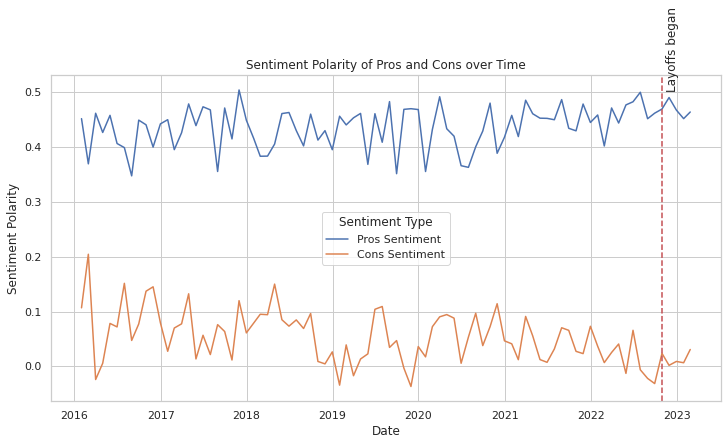

In [ ]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
meta_data['Pros Sentiment'] = meta_data['Pros'].apply(lambda x: TextBlob(x).sentiment.polarity)
meta_data['Cons Sentiment'] = meta_data['Cons'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_monthly = meta_data.resample('M', on='Date').mean().reset_index()

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(meta_data, id_vars=['Company_Name', 'Rating', 'Date'], value_vars=['Pros Sentiment', 'Cons Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(df_monthly, id_vars=['Date'], value_vars=['Pros Sentiment', 'Cons Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the sentiment polarity over time
sns.set(style='whitegrid')
sns.lineplot(data=df_melted, x='Date', y='Sentiment Polarity', hue='Sentiment Type')

# Add vertical line for layoffs
plt.axvline(pd.Timestamp('2022-11-01'), color='r', linestyle='--')
plt.text(pd.Timestamp('2022-11-15'), 0.5, 'Layoffs began', rotation=90, verticalalignment='bottom')

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Sentiment Polarity')

# Set the title of the plot
plt.title('Sentiment Polarity of Pros and Cons over Time')

# Show the plot
plt.show()

In [ ]:
meta_data["Review"] =   meta_data['Pros'] + "." + meta_data['Cons']

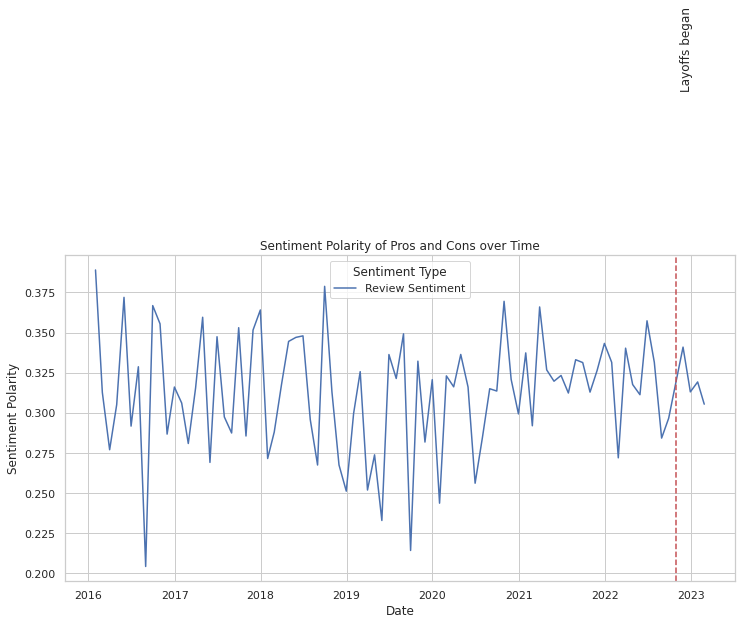

In [ ]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
meta_data['Review Sentiment'] = meta_data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_monthly = meta_data.resample('M', on='Date').mean().reset_index()

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(meta_data, id_vars=['Company_Name', 'Rating', 'Date'], value_vars=['Review Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(df_monthly, id_vars=['Date'], value_vars=['Review Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the sentiment polarity over time
sns.set(style='whitegrid')
sns.lineplot(data=df_melted, x='Date', y='Sentiment Polarity', hue='Sentiment Type')

# Add vertical line for layoffs
plt.axvline(pd.Timestamp('2022-11-01'), color='r', linestyle='--')
plt.text(pd.Timestamp('2022-11-15'), 0.5, 'Layoffs began', rotation=90, verticalalignment='bottom')

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Sentiment Polarity')

# Set the title of the plot
plt.title('Sentiment Polarity of Pros and Cons over Time')

# Show the plot
plt.show()

In [ ]:
from textblob import TextBlob

def get_positive_words(text):
    """
    Returns a list of positive words and phrases from the given text.
    """
    # Create a TextBlob object for the text
    blob = TextBlob(text)
    
    # Get the list of words and phrases
    words = blob.words + blob.noun_phrases
    
    # Initialize a flag to track negation
    negation = False
    
    # Initialize an empty list to store positive words and phrases
    positive_words = []
    
    # Loop through each word in the text
    for word in words:
        # If the word is a negation word, set the negation flag
        if word in ["not", "n't", "never"]:
            negation = True
        
        # If the word is not a negation word and has positive polarity, add it to the list of positive words
        elif TextBlob(word).sentiment.polarity > 0:
            # If the negation flag is set, flip the polarity of the word and add it to the list of positive words
            if negation:
                positive_words.append("not " + word)
                negation = False
            else:
                positive_words.append(word)
        
        # If the word is not a negation word and has negative polarity, reset the negation flag
        elif TextBlob(word).sentiment.polarity < 0:
            negation = False
    
    return positive_words

In [ ]:
positive_words = meta_data["Pros"].apply(get_positive_words)

In [ ]:
flat_list = [word for sublist in positive_words for word in sublist]

In [ ]:
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'great': 5314, 'good': 4645, 'very': 1286, 'smart': 1276, 'amazing': 1188, 'best': 825, 'free': 774, 'great benefits': 773, 'nice': 733, 'really': 724, 'fast': 631, 'interesting': 561, 'smart people': 519, 'high': 491, 'free food': 432, 'great people': 396, 'many': 392, 'excellent': 364, 'friendly': 357, 'most': 349, 'good benefits': 348, 'awesome': 341, 'challenging': 323, 'fun': 323, 'new': 296, 'great perks': 293, 'strong': 286, 'talented': 283, 'top': 280, 'great place': 269, 'love': 258, 'great culture': 252, 'more': 252, 'supportive': 238, 'incredible': 216, 'much': 199, 'better': 196, 'easy': 188, 'great company': 177, 'good salary': 176, 'exciting': 173, 'good perks': 172, 'cool': 162, 'super': 153, 'own': 146, 'good compensation': 144, 'huge': 139, 'amazing benefits': 137, 'highly': 137, 'fantastic': 136, 'kind': 133, 'large': 132, 'good company': 129, 'pretty': 127, 'interesting work': 121, 'good people': 120, 'positive': 120, 'decent': 115, 'good culture': 113, 'first': 112

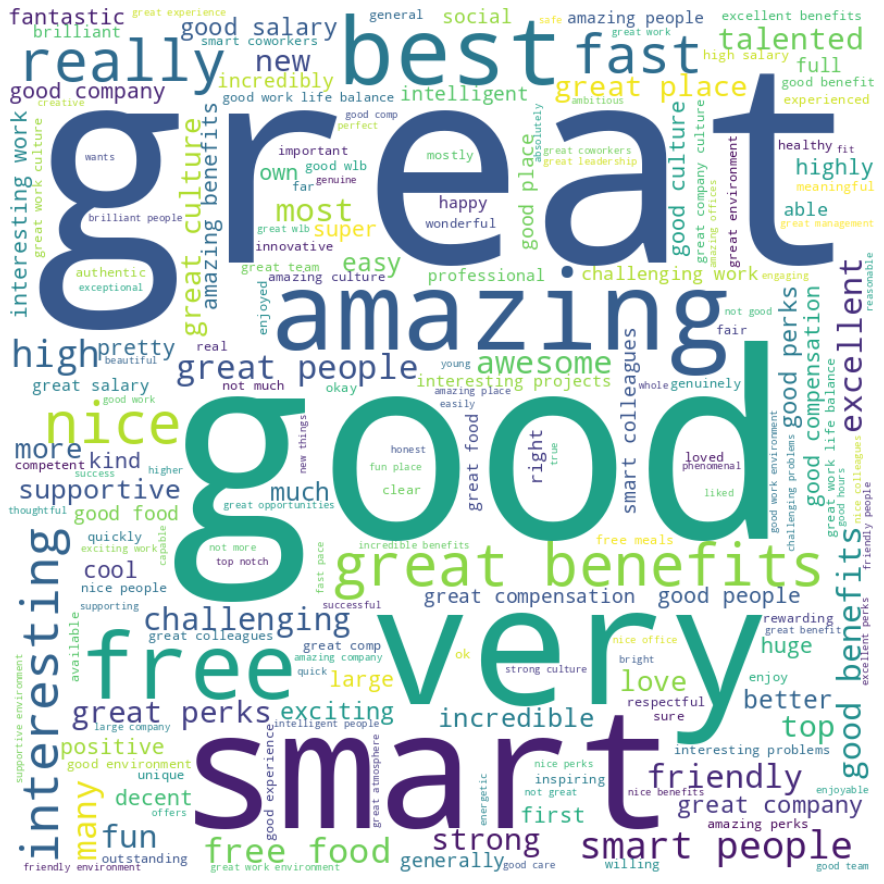

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from textblob import TextBlob

def get_negative_words(text):
    """
    Returns a list of negative words and phrases from the given text.
    """
    # Create a TextBlob object for the text
    blob = TextBlob(text)
    
    # Get the list of words and phrases
    words = blob.words + blob.noun_phrases
    
    # Initialize a flag to track negation
    negation = False
    
    # Initialize an empty list to store negative words and phrases
    negative_words = []
    
    # Loop through each word in the text
    for word in words:
        # If the word is a negation word, set the negation flag
        if word in ["not", "n't", "never"]:
            negation = True
        
        # If the word is not a negation word and has negative polarity, add it to the list of negative words
        elif TextBlob(word).sentiment.polarity < 0:
            # If the negation flag is set, flip the polarity of the word and add it to the list of negative words
            if negation:
                negative_words.append("not " + word)
                negation = False
            else:
                negative_words.append(word)
        
        # If the word is not a negation word and has positive polarity, reset the negation flag
        elif TextBlob(word).sentiment.polarity > 0:
            negation = False
    
    return negative_words


In [ ]:
negative_words = meta_data["Cons"].apply(get_negative_words)

In [ ]:
flat_list = [word for sublist in negative_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'bad': 810, 'hard': 730, 'long': 483, 'difficult': 367, 'poor': 346, 'other': 343, 'little': 323, 'down': 230, 'due': 230, 'negative': 228, 'less': 202, 'slow': 169, 'long hours': 167, 'tough': 150, 'limited': 144, 'extremely': 123, 'terrible': 101, 'remote': 98, 'few': 98, 'heavy': 92, 'harder': 83, 'expected': 82, 'worst': 78, 'not bad': 72, 'small': 70, 'not other': 62, 'boring': 60, 'horrible': 60, 'bad wlb': 56, 'spent': 55, 'frustrating': 52, 'complex': 52, 'bad work life balance': 48, 'wrong': 48, 'half': 46, 'worse': 45, 'late': 44, 'fake': 44, 'least': 43, 'common': 40, 'messy': 40, 'hard work': 40, 'questionable': 39, 'unnecessary': 36, 'inexperienced': 36, 'poor management': 36, 'behind': 35, 'flat': 35, 'mean': 34, 'not hard': 34, 'weak': 33, 'impossible': 33, 'unfortunately': 31, 'negative press': 31, 'broken': 30, 'not long': 30, 'usually': 29, 'hate': 29, 'bad management': 28, 'incompetent': 28, 'past': 28, 'average': 28, 'awful': 27, 'sucks': 27, 'crazy': 27, 'exhausti

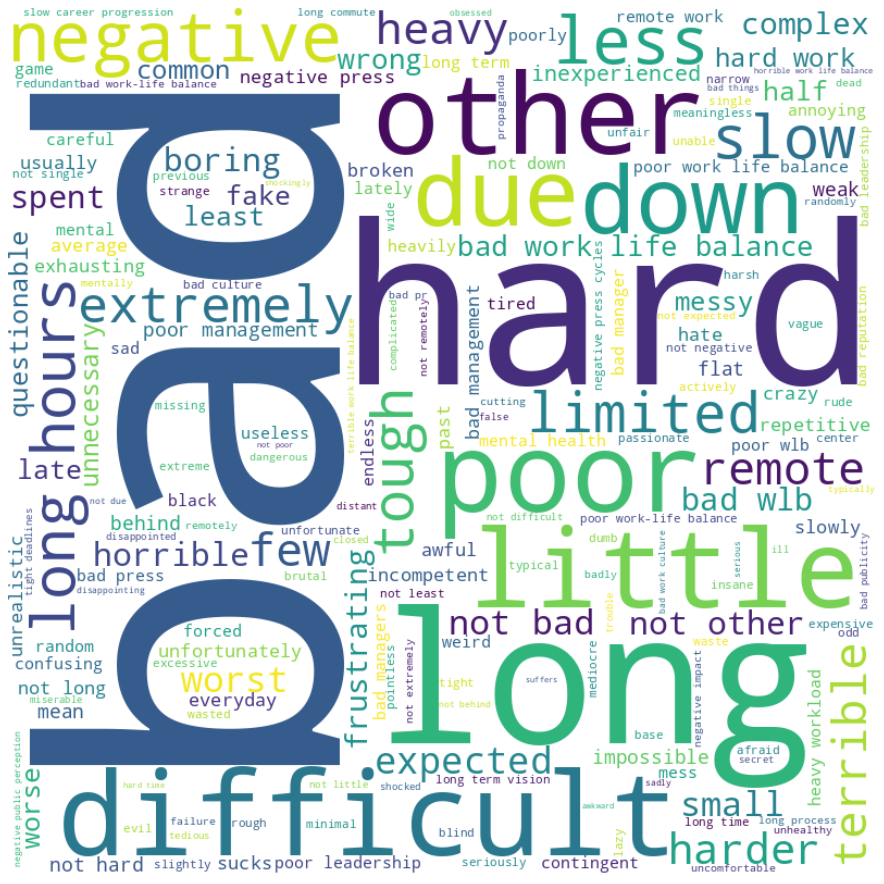

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Filtering pre and post layoffs


In [ ]:
meta_data["Date"] = pd.to_datetime(meta_data["Date"])

In [ ]:
meta_data_post_layoff =   meta_data[meta_data["Date"] >= "2022-11-30"]

In [ ]:
meta_data_pre_layoff =   meta_data[meta_data["Date"] <= "2022-11-01"]

##Analysing Pre layoff positive sentiments(pros)






In [ ]:
positive_words = meta_data_pre_layoff["Pros"].apply(get_positive_words)
flat_list = [word for sublist in positive_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'great': 4873, 'good': 4050, 'very': 1359, 'smart': 1256, 'amazing': 1118, 'really': 827, 'best': 816, 'free': 742, 'fast': 700, 'nice': 660, 'great benefits': 640, 'smart people': 547, 'interesting': 521, 'high': 485, 'awesome': 429, 'free food': 407, 'many': 397, 'fun': 371, 'most': 370, 'friendly': 339, 'excellent': 339, 'challenging': 337, 'great people': 329, 'new': 327, 'more': 324, 'strong': 300, 'great perks': 287, 'great place': 283, 'love': 269, 'good benefits': 266, 'much': 258, 'talented': 252, 'top': 244, 'great culture': 235, 'better': 230, 'incredible': 227, 'supportive': 225, 'easy': 191, 'huge': 180, 'exciting': 179, 'own': 177, 'cool': 161, 'super': 161, 'pretty': 158, 'great company': 156, 'fantastic': 146, 'good perks': 145, 'incredibly': 144, 'good salary': 143, 'kind': 133, 'highly': 127, 'large': 126, 'first': 122, 'good compensation': 118, 'amazing benefits': 115, 'positive': 113, 'generally': 112, 'social': 110, 'decent': 107, 'intelligent': 106, 'able': 104, 

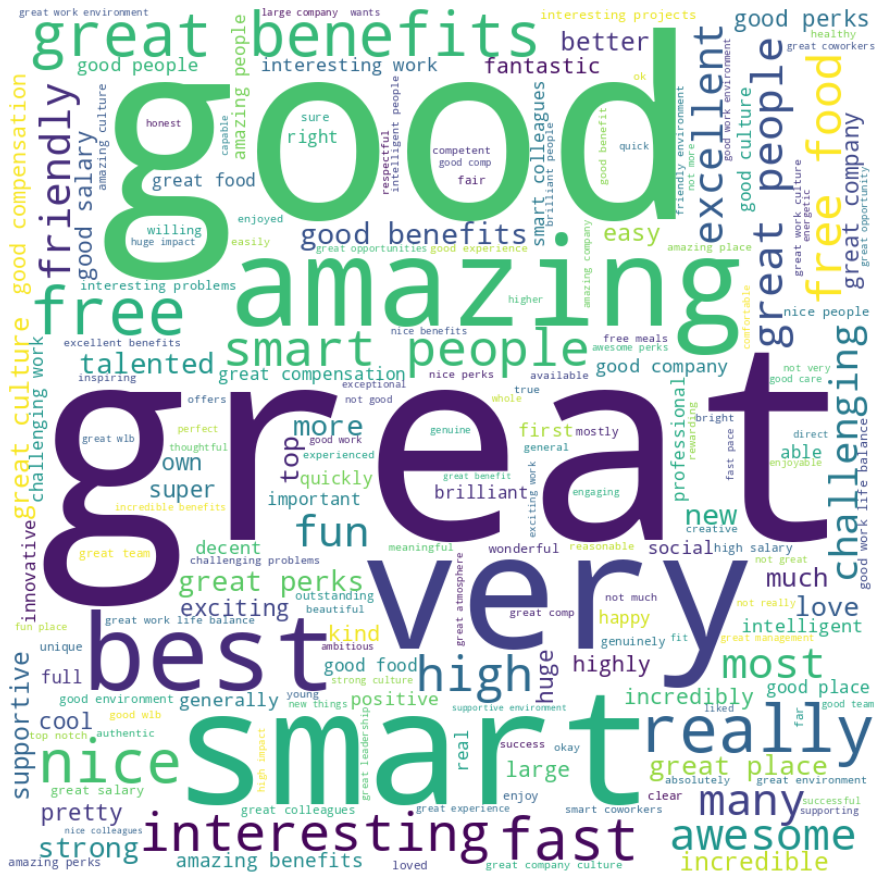

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
doc1_pros =" "
for comment in meta_data_pre_layoff["Pros"]:
    doc1_pros = doc1_pros + str(comment)

Filtering out all the adjectives("JJ")

In [ ]:
tokens = nltk.word_tokenize(doc1_pros)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)

In [ ]:
top_10_attributes

[('great', 3143),
 ('good', 2562),
 ('smart', 982),
 ('best', 626),
 ('free', 594),
 ('open', 464),
 ('nice', 437),
 ('i', 433),
 ('amazing', 387),
 ('many', 386)]

Filtering out all the superlative adjectives ("JJS")

In [ ]:
tokens = nltk.word_tokenize(doc1_pros)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJS")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)

In [ ]:
top_10_attributes

[('best', 626),
 ('most', 150),
 ('smartest', 119),
 ('least', 55),
 ('brightest', 42),
 ('honest', 22),
 ('biggest', 20),
 ('greatest', 15),
 ('latest', 12),
 ('highest', 10)]

##Analysing Negative sentiments (cons) pre layoff

In [ ]:
negative_words = meta_data_pre_layoff["Cons"].apply(get_negative_words)
flat_list = [word for sublist in negative_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'hard': 735, 'bad': 700, 'long': 481, 'difficult': 362, 'other': 349, 'little': 345, 'poor': 269, 'less': 216, 'down': 207, 'due': 200, 'negative': 196, 'long hours': 179, 'tough': 151, 'slow': 150, 'limited': 143, 'extremely': 122, 'few': 99, 'remote': 91, 'expected': 83, 'harder': 79, 'small': 77, 'terrible': 77, 'not bad': 74, 'heavy': 71, 'worst': 65, 'not other': 62, 'boring': 60, 'least': 54, 'frustrating': 52, 'spent': 48, 'horrible': 46, 'late': 46, 'bad wlb': 45, 'complex': 44, 'wrong': 44, 'messy': 43, 'hard work': 43, 'half': 43, 'bad work life balance': 42, 'inexperienced': 42, 'average': 39, 'mean': 37, 'not hard': 37, 'fake': 36, 'worse': 35, 'impossible': 35, 'crazy': 35, 'flat': 33, 'behind': 32, 'poor management': 31, 'usually': 30, 'incompetent': 30, 'common': 29, 'questionable': 29, 'hate': 29, 'broken': 28, 'not long': 28, 'exhausting': 27, 'game': 27, 'past': 27, 'sucks': 26, 'negative press': 26, 'slowly': 25, 'unrealistic': 25, 'black': 25, 'weak': 24, 'repetiti

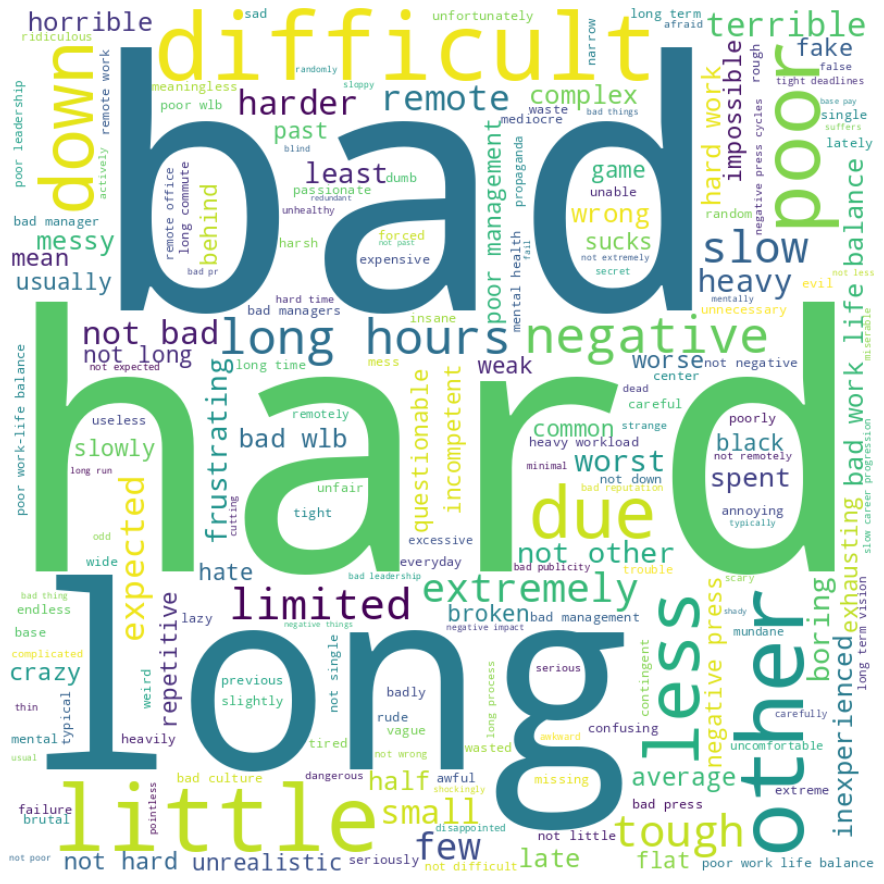

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
doc1_cons =" "
for comment in meta_data_pre_layoff["Cons"]:
    doc1_cons = doc1_cons + str(comment)

In [ ]:
tokens = nltk.word_tokenize(doc1_cons)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)
top_10_attributes

[('many', 113),
 ('good', 76),
 ('other', 75),
 ('much', 68),
 ('more', 64),
 ('hard', 59),
 ('new', 54),
 ('great', 52),
 ('little', 49),
 ('bad', 43)]

#  Analysing Post Layoffs positive sentiments

In [ ]:
positive_words = meta_data_post_layoff["Pros"].apply(get_positive_words)
flat_list = [word for sublist in positive_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)


{'great': 573, 'good': 445, 'amazing': 147, 'smart': 142, 'great benefits': 108, 'very': 106, 'free': 81, 'nice': 75, 'best': 73, 'interesting': 67, 'great people': 62, 'good benefits': 55, 'really': 54, 'high': 50, 'free food': 50, 'fast': 43, 'most': 42, 'many': 39, 'friendly': 37, 'excellent': 36, 'smart people': 35, 'fun': 35, 'talented': 32, 'top': 27, 'great company': 26, 'good perks': 24, 'amazing benefits': 23, 'super': 22, 'good company': 22, 'cool': 21, 'great culture': 20, 'more': 20, 'easy': 19, 'large': 18, 'interesting work': 18, 'supportive': 17, 'exciting': 17, 'good salary': 17, 'new': 16, 'challenging': 16, 'good people': 16, 'great perks': 15, 'nice colleagues': 14, 'great compensation': 13, 'right': 13, 'decent': 13, 'love': 12, 'mostly': 12, 'incredible': 12, 'awesome': 12, 'strong': 12, 'brilliant': 12, 'kind': 11, 'generally': 11, 'highly': 11, 'smart colleagues': 11, 'willing': 11, 'great colleagues': 11, 'good culture': 10, 'full': 10, 'social': 10, 'exceptiona

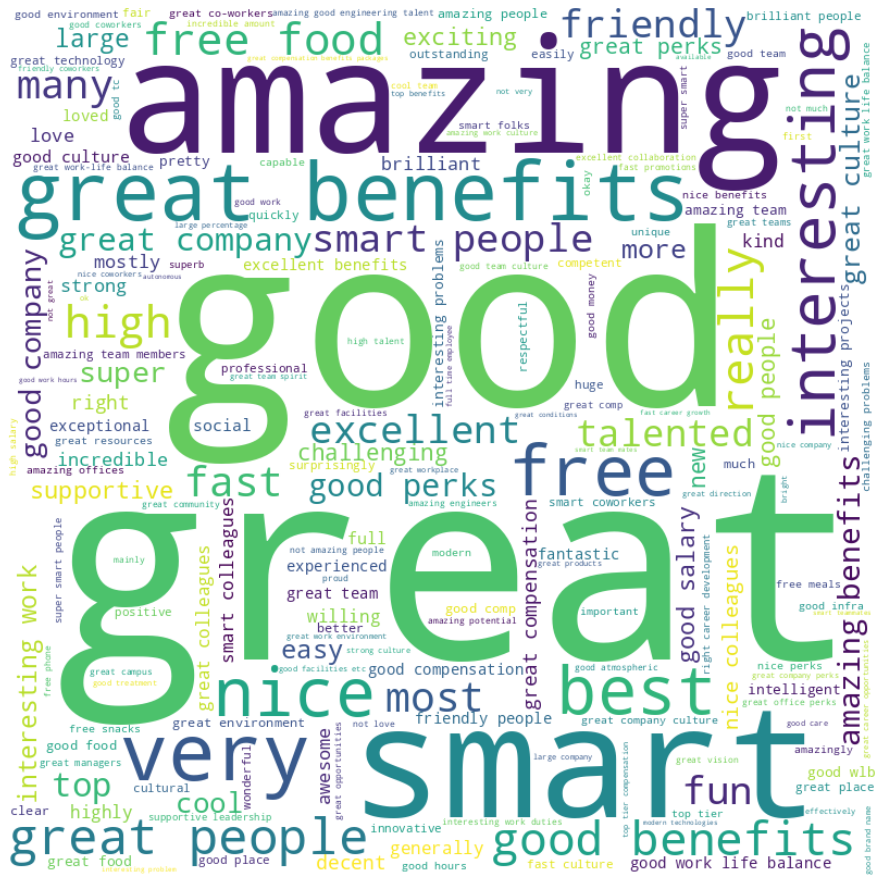

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
doc1_pros =" "
for comment in meta_data_post_layoff["Pros"]:
    doc1_pros = doc1_pros+comment

In [ ]:
tokens = nltk.word_tokenize(doc1_pros)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)
top_10_attributes

[('great', 31),
 ('good', 19),
 ('amazing', 10),
 ('nice', 7),
 ('smart', 6),
 ('supportive', 5),
 ('work-life', 4),
 ('interesting', 4),
 ('new', 4),
 ('much', 3)]

#Analysing  Post Layoffs negative sentiments (Cons)


In [ ]:
negative_words = meta_data_post_layoff["Cons"].apply(get_negative_words)
flat_list = [word for sublist in negative_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'bad': 69, 'hard': 62, 'poor': 56, 'long': 38, 'due': 38, 'other': 31, 'down': 30, 'difficult': 28, 'heavy': 22, 'little': 21, 'negative': 20, 'slow': 17, 'tough': 16, 'less': 16, 'few': 14, 'limited': 13, 'remote': 13, 'terrible': 12, 'long hours': 10, 'extremely': 10, 'worse': 9, 'poor leadership': 9, 'unnecessary': 9, 'boring': 8, 'common': 8, 'harder': 8, 'confusing': 8, 'frustrating': 7, 'late': 7, 'everyday': 7, 'spent': 7, 'bad wlb': 7, 'mental': 7, 'mental health': 7, 'wrong': 7, 'worst': 6, 'horrible': 6, 'heavy workload': 6, 'complex': 6, 'bad work life balance': 6, 'not long': 6, 'long term': 6, 'blind': 5, 'questionable': 5, 'unfortunate': 5, 'slowly': 5, 'expected': 5, 'usually': 5, 'not other': 5, 'behind': 5, 'unfortunately': 5, 'poorly': 5, 'pointless': 5, 'bad management': 4, 'small': 4, 'awful': 4, 'useless': 4, 'flat': 4, 'minimal': 4, 'wasted': 4, 'mess': 4, 'negative impact.continue reading': 4, 'dirty': 4, 'poor software solutions': 4, 'hate': 4, 'bad work-life b

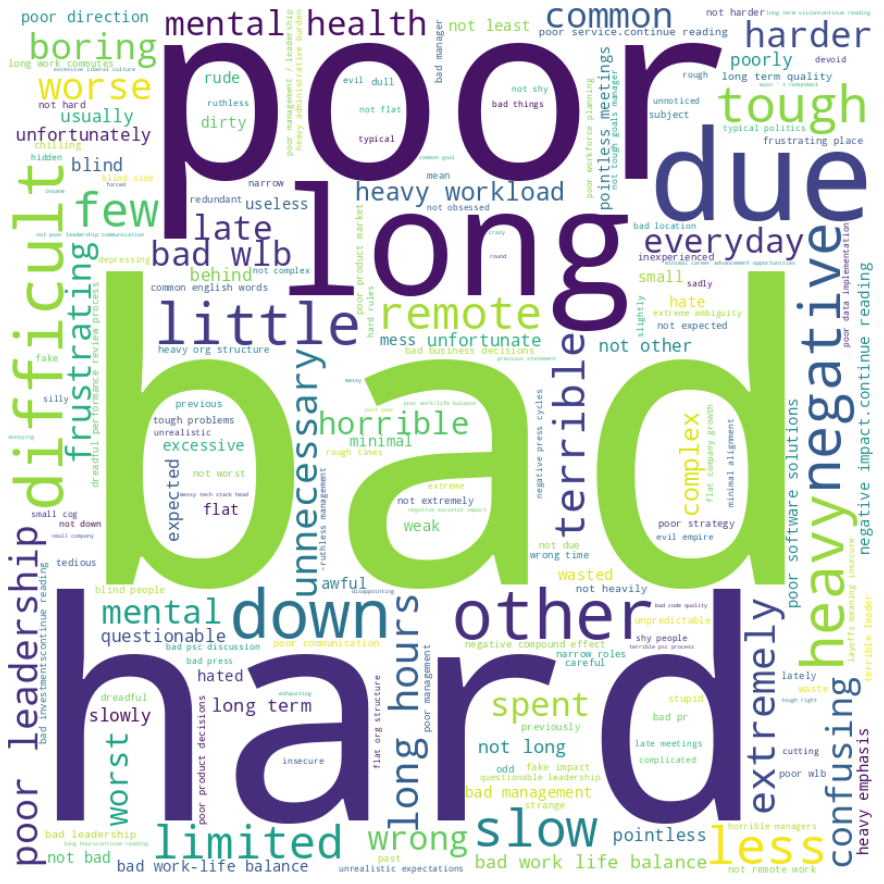

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
doc1_cons =" "
for comment in meta_data_post_layoff["Cons"]:
    doc1_cons = doc1_cons+str(comment)

In [ ]:
tokens = nltk.word_tokenize(doc1_cons)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)

In [ ]:
top_10_attributes

[('new', 8),
 ('different', 6),
 ('poor', 5),
 ('slow', 4),
 ('chaotic', 4),
 ('best', 4),
 ('toxic', 4),
 ('terrible', 4),
 ('bad', 4),
 ('more', 3)]

# Mentions about Mark Zuckerberg

In [ ]:
# Create a list of keywords to search for
keywords = ['Mark Zuckerberg', 'Mark', 'Zuckerberg', 'zuckerberg', 'mark']

# Create a regular expression pattern to match the keywords
pattern = '|'.join(keywords)

# Count the number of mentions of the keywords in the 'Cons' column
mention_count = meta_data_post_layoff['Cons'].str.count(pattern).sum()

# Print the count
print(f'The number of mentions of the Mark Zuckerberg in negative comments is: {mention_count}')

The number of mentions of the Mark Zuckerberg in negative comments is: 15


In [ ]:
# Create a list of keywords to search for
keywords = ['Mark Zuckerberg', 'Mark', 'Zuckerberg', 'zuckerberg', 'mark']

# Create a regular expression pattern to match the keywords
pattern = '|'.join(keywords)

# Count the number of mentions of the keywords in the 'Cons' column
mention_count = meta_data_post_layoff['Pros'].str.count(pattern).sum()

# Print the count
print(f'The number of mentions of the Mark Zuckerberg in positive comments is: {mention_count}')

The number of mentions of the Mark Zuckerberg in positive comments is: 15


In [ ]:
# Filter the rows where any of the keywords are present in the 'Cons' or 'Pros' column
filtered_data = meta_data_pre_layoff[(meta_data_pre_layoff['Cons'].str.contains(pattern)) | (meta_data_pre_layoff['Pros'].str.contains(pattern))]

In [ ]:
positive_words = filtered_data["Pros"].apply(get_positive_words)

In [ ]:
flat_list = [word for sublist in positive_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words_pros = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words_pros)

{'great': 142, 'very': 85, 'good': 75, 'smart': 42, 'top': 42, 'really': 38, 'amazing': 34, 'many': 33, 'best': 28, 'more': 26, 'high': 26, 'first': 25, 'strong': 24, 'free': 23, 'most': 22, 'much': 21, 'love': 20, 'new': 19, 'great people': 19, 'interesting': 17, 'nice': 17, 'super': 16, 'great benefits': 15, 'awesome': 13, 'fun': 13, 'better': 13, 'incredible': 12, 'incredibly': 12, 'fast': 12, 'smart people': 12, 'own': 11, 'great perks': 11, 'supportive': 11, 'talented': 10, 'free food': 10, 'sure': 10, 'happy': 9, 'large': 9, 'challenging': 8, 'kind': 8, 'able': 8, 'fantastic': 8, 'interesting projects': 7, 'amazing benefits': 7, 'exciting': 7, 'not great': 7, 'not top': 7, 'cool': 7, 'creative': 7, 'real': 7, 'huge': 7, 'not much': 7, 'pretty': 6, 'genuinely': 6, 'smart colleagues': 6, 'right': 6, 'not good': 6, 'success': 6, 'highly': 6, 'excellent': 6, 'inspiring': 5, 'amazing culture': 5, 'not very': 5, 'main': 5, 'good benefits': 5, 'directly': 5, 'great ceo': 5, 'generally':

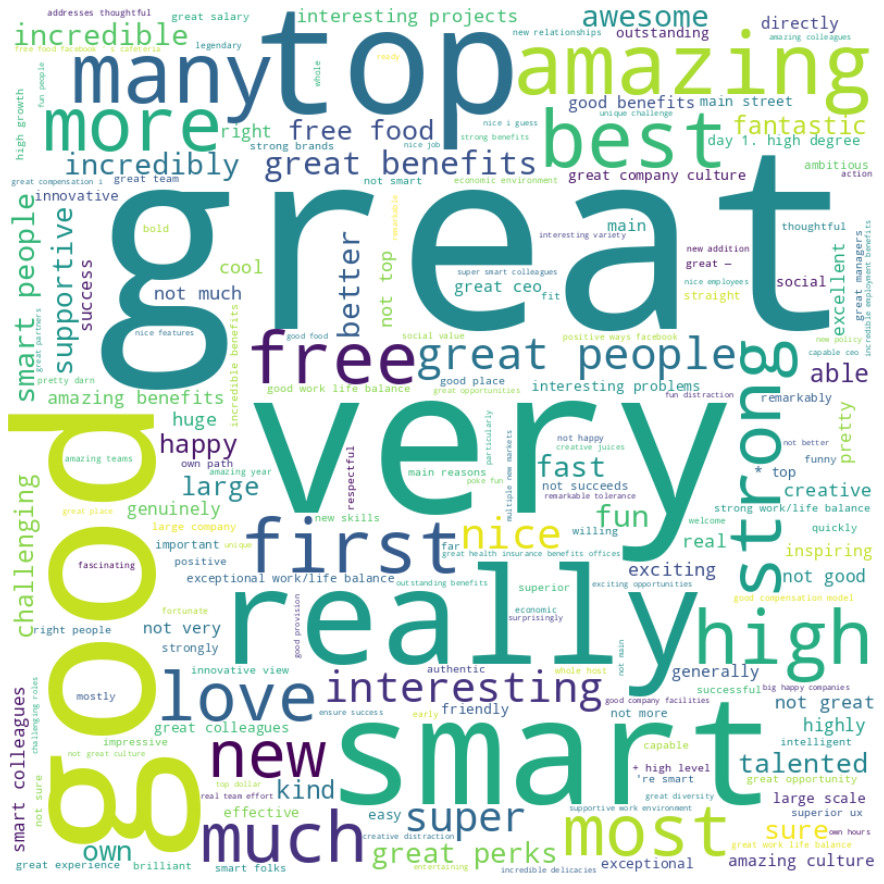

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words_pros)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
negative_words = filtered_data["Cons"].apply(get_negative_words)

In [ ]:
flat_list = [word for sublist in negative_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words_cons = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words_cons)

{'bad': 42, 'little': 28, 'hard': 24, 'poor': 16, 'other': 16, 'long': 15, 'down': 13, 'negative': 12, 'less': 12, 'difficult': 11, 'few': 11, 'tough': 9, 'due': 8, 'extremely': 8, 'not other': 7, 'exhausting': 6, 'bad manager': 6, 'limited': 6, 'behind': 6, 'unnecessary': 6, 'fake': 6, 'sloppy': 5, 'harder': 5, 'expected': 5, 'wrong': 5, 'not bad': 5, 'incompetent': 5, 'spent': 5, 'frustrating': 5, 'heavy': 5, 'terrible': 4, 'least': 4, 'bad managers': 4, 'excessive': 4, 'uncomfortable': 4, 'small': 4, 'selfish': 3, 'sloppy decision makingcontinue reading': 3, 'mean': 3, 'sad': 3, 'half': 3, 'seriously': 3, 'useless': 3, 'mental': 3, 'destroy': 3, 'false': 3, 'negative impacts': 3, 'mental health': 3, 'poor review': 3, 'false information': 3, 'bad review': 3, 'broken': 3, 'not hard': 3, 'bad work/life balance *': 3, 'excessive meetings * performance': 3, 'bad practices * stack rankingcontinue reading': 3, 'poor company leadership': 3, 'dead': 3, 'late': 3, 'bad sign': 3, 'bad press cy

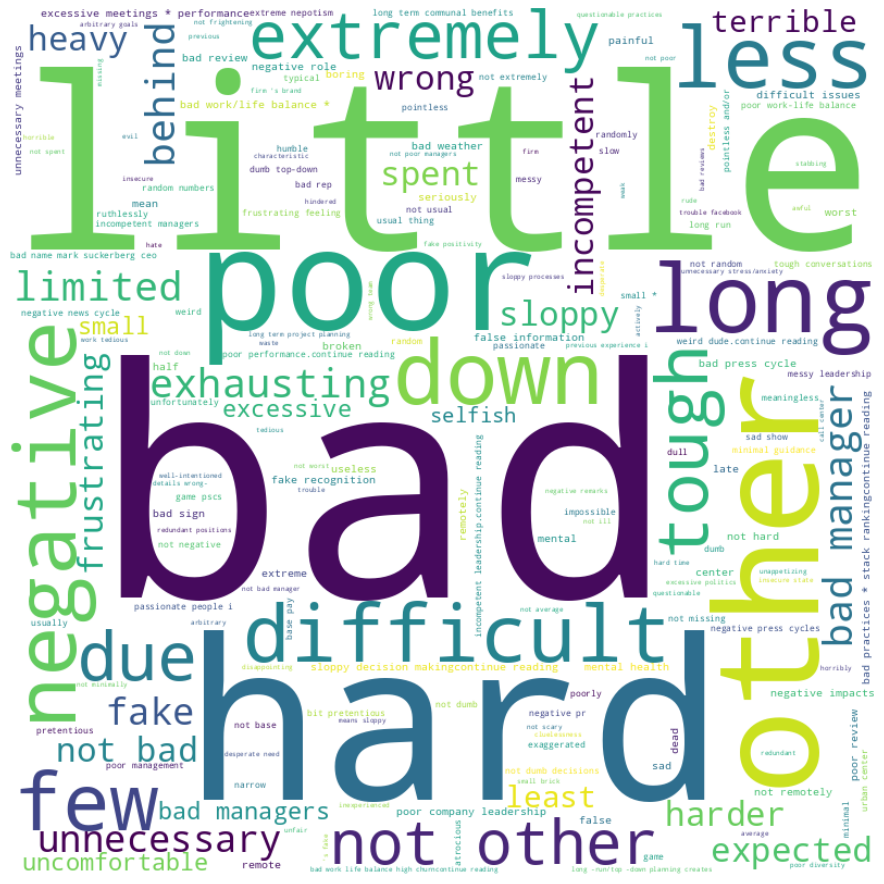

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words_cons)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()